**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

# *A comparison between Logistic Regression and MPL Neural Network in Music Genre Classification* 

## Abstract

*Precise summary of the whole report, previews the contents and results. Must be a single paragraph between 100 and 200 words.*

This machine learning project aims to classify music into one of these ten genres: Pop-Rock, Electronic, Rap, Jazz, Latin, RnB, International, Country, Reggae and Blues; using 3 components of music: timbre, pitch (melody and harmony) and rhythm. Logistic Regression and MPL Neural Network are applied with Neural Networks combined with Principle Component Analysis (PCA) producing the best result (0.66 accuracy score on Kaggle). Data imbalance results in overfitting for the overrepresented classes and our effort to use undersampling/oversampling ends in worse results due to changing data distribution. Moreover, our model is not robust enough (66% accuracy is not highly accurate) and does not generalize well for new data because of the similarity betweem our training and testing dataset's data distribution. Due to time constraints, some prospective methods/techniques have not been explored such as semi-supervise learning and model ensembling.


## 1. Introduction

*Background, problem statement, motivation, many references, description of
contents. Introduces the reader to the topic and the broad context within which your
research/project fits*

*- What do you hope to learn from the project?*
*- What question is being addressed?*
*- Why is this task important? (motivation)*

*Keep it short (half to 1 page).*

This is the final report of a machine learning project with the purpose of classifying music to one of the ten genres: Pop-Rock, Electronic, Rap, Jazz, Latin, RnB, International, Country, Reggae and Blues; using 3 components of music: timbre, pitch (melody and harmony) and rhythm. From this project, our group aims to complete a whole machine learning project to understand the whole process of completing a data analysis project and apply our machine learning skills from our university course.

Questions the project aims to answer:
<br>
*Which machine learning method should be used for music classification?
<br>
How to create a music good-performing classifying model to predict music genre?*

These questions would help our group solve this multi-class classification problem. This classification can be applied in music applications to recognize the genre and quickly place new music tracks into different groups/genres. 




## 2. Data analysis

Our data analysis follows the following process:

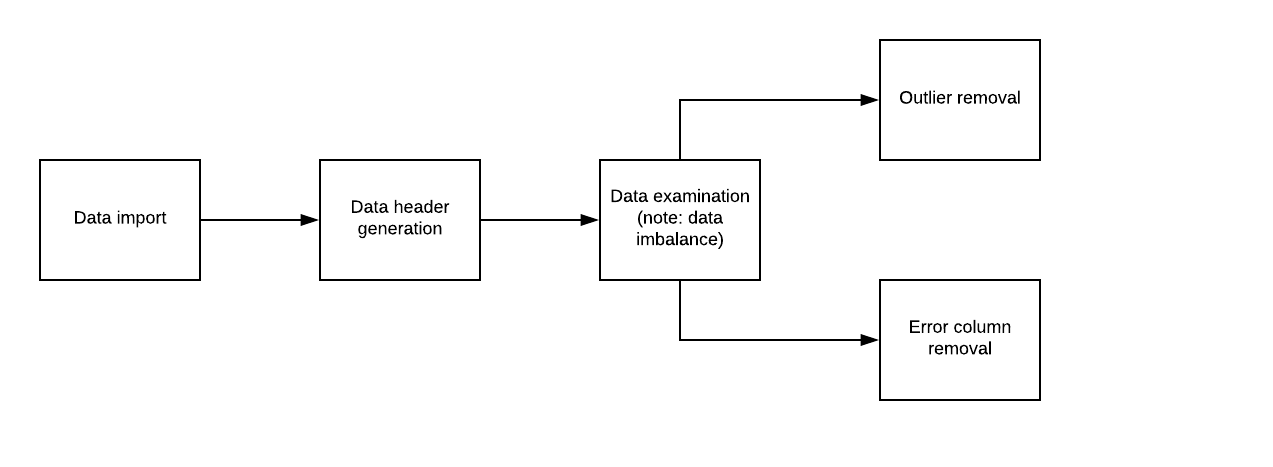

In [1]:
from IPython.display import Image
Image(filename='block digram for  data analytics.png') 

First we start with importing data in and assign corresponding headers and data types. 

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Load the data and cleanup
x_header = pd.read_csv("x_header.csv")
train_data = pd.read_csv('train_data.csv', header = None)
test_data = pd.read_csv('test_data.csv', header = None)
train_labels = pd.read_csv('train_labels.csv', header = None, dtype = 'category' )

header = pd.DataFrame(data = x_header)
X = pd.DataFrame(data = train_data)
X.columns = header.ID
X_test = pd.DataFrame(data = test_data)
X_test.columns = header.ID
y = pd.DataFrame(data = train_labels)
y.columns = ['Genre']


Let's start with examining the labels. 
We have 10 labels denoting by numbers from 1-10, each corresponding to one music genre. A histogram is created to show the distribution of these 10 classes (Figure 1). We can see clearly in here there is a significant imbalance between those classes. Pop/Rock already accounts for 50% of the labels. Also, there are minority classes like Blues, Reggae in which only account for 2% of the training data. This lack of information will make it difficult for training the models to classify minority classes. 

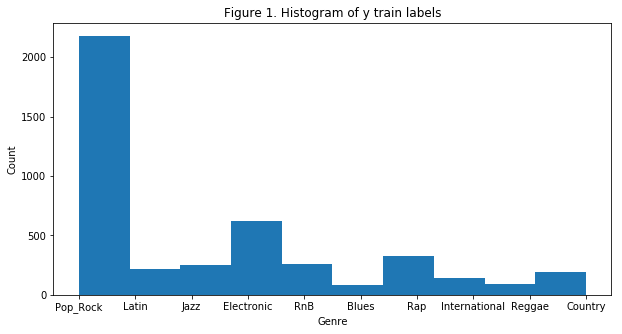

(array(['1', '10', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object), array([2178,   86,  618,  326,  253,  214,  260,  141,  195,   92]))


In [3]:
#Examine y
plt.figure(figsize=(10,5))
plt.hist(y.values)
plt.xlabel("Genre")
plt.ylabel("Count")
x_values = ['1','2','3','4','5','6','7','8','9','10']
x_texts = ['Pop_Rock', 'Electronic', 'Rap', 'Jazz', 'Latin', 'RnB', 'International', 'Country', 'Reggae', 'Blues']
plt.xticks(x_values, x_texts)
plt.title("Figure 1. Histogram of y train labels")
plt.show()

print(np.unique(y,return_counts = True))

Next we move on to examine the feature data:

In [4]:
#Analysis of the feature data
X.drop_duplicates() #drop duplicates if there are
print(X.info())
print(X_test.info())
display(HTML(X.head(10).to_html(max_rows=10)))
display(HTML(X_test.head(10).to_html(max_rows=10)))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363 entries, 0 to 4362
Columns: 264 entries, Rhythm_Mean_1 to MFCC_Max_12
dtypes: float64(264)
memory usage: 8.8 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6544 entries, 0 to 6543
Columns: 264 entries, Rhythm_Mean_1 to MFCC_Max_12
dtypes: float64(264)
memory usage: 13.2 MB
None


ID,Rhythm_Mean_1,Rhythm_Mean_2,Rhythm_Mean_3,Rhythm_Mean_4,Rhythm_Mean_5,Rhythm_Mean_6,Rhythm_Mean_7,Rhythm_Mean_8,Rhythm_Mean_9,Rhythm_Mean_10,Rhythm_Mean_11,Rhythm_Mean_12,Rhythm_Mean_13,Rhythm_Mean_14,Rhythm_Mean_15,Rhythm_Mean_16,Rhythm_Mean_17,Rhythm_Mean_18,Rhythm_Mean_19,Rhythm_Mean_20,Rhythm_Mean_21,Rhythm_Mean_22,Rhythm_Mean_23,Rhythm_Mean_24,Rhythm_Median_1,Rhythm_Median_2,Rhythm_Median_3,Rhythm_Median_4,Rhythm_Median_5,Rhythm_Median_6,Rhythm_Median_7,Rhythm_Median_8,Rhythm_Median_9,Rhythm_Median_10,Rhythm_Median_11,Rhythm_Median_12,Rhythm_Median_13,Rhythm_Median_14,Rhythm_Median_15,Rhythm_Median_16,Rhythm_Median_17,Rhythm_Median_18,Rhythm_Median_19,Rhythm_Median_20,Rhythm_Median_21,Rhythm_Median_22,Rhythm_Median_23,Rhythm_Median_24,Rhythm_Var_1,Rhythm_Var_2,Rhythm_Var_3,Rhythm_Var_4,Rhythm_Var_5,Rhythm_Var_6,Rhythm_Var_7,Rhythm_Var_8,Rhythm_Var_9,Rhythm_Var_10,Rhythm_Var_11,Rhythm_Var_12,Rhythm_Var_13,Rhythm_Var_14,Rhythm_Var_15,Rhythm_Var_16,Rhythm_Var_17,Rhythm_Var_18,Rhythm_Var_19,Rhythm_Var_20,Rhythm_Var_21,Rhythm_Var_22,Rhythm_Var_23,Rhythm_Var_24,Rhythm_Kurtosis_1,Rhythm_Kurtosis_2,Rhythm_Kurtosis_3,Rhythm_Kurtosis_4,Rhythm_Kurtosis_5,Rhythm_Kurtosis_6,Rhythm_Kurtosis_7,Rhythm_Kurtosis_8,Rhythm_Kurtosis_9,Rhythm_Kurtosis_10,Rhythm_Kurtosis_11,Rhythm_Kurtosis_12,Rhythm_Kurtosis_13,Rhythm_Kurtosis_14,Rhythm_Kurtosis_15,Rhythm_Kurtosis_16,Rhythm_Kurtosis_17,Rhythm_Kurtosis_18,Rhythm_Kurtosis_19,Rhythm_Kurtosis_20,Rhythm_Kurtosis_21,Rhythm_Kurtosis_22,Rhythm_Kurtosis_23,Rhythm_Kurtosis_24,Rhythm_Skewness_1,Rhythm_Skewness_2,Rhythm_Skewness_3,Rhythm_Skewness_4,Rhythm_Skewness_5,Rhythm_Skewness_6,Rhythm_Skewness_7,Rhythm_Skewness_8,Rhythm_Skewness_9,Rhythm_Skewness_10,Rhythm_Skewness_11,Rhythm_Skewness_12,Rhythm_Skewness_13,Rhythm_Skewness_14,Rhythm_Skewness_15,Rhythm_Skewness_16,Rhythm_Skewness_17,Rhythm_Skewness_18,Rhythm_Skewness_19,Rhythm_Skewness_20,Rhythm_Skewness_21,Rhythm_Skewness_22,Rhythm_Skewness_23,Rhythm_Skewness_24,Rhythm_Min_1,Rhythm_Min_2,Rhythm_Min_3,Rhythm_Min_4,Rhythm_Min_5,Rhythm_Min_6,Rhythm_Min_7,Rhythm_Min_8,Rhythm_Min_9,Rhythm_Min_10,Rhythm_Min_11,Rhythm_Min_12,Rhythm_Min_13,Rhythm_Min_14,Rhythm_Min_15,Rhythm_Min_16,Rhythm_Min_17,Rhythm_Min_18,Rhythm_Min_19,Rhythm_Min_20,Rhythm_Min_21,Rhythm_Min_22,Rhythm_Min_23,Rhythm_Min_24,Rhythm_Max_1,Rhythm_Max_2,Rhythm_Max_3,Rhythm_Max_4,Rhythm_Max_5,Rhythm_Max_6,Rhythm_Max_7,Rhythm_Max_8,Rhythm_Max_9,Rhythm_Max_10,Rhythm_Max_11,Rhythm_Max_12,Rhythm_Max_13,Rhythm_Max_14,Rhythm_Max_15,Rhythm_Max_16,Rhythm_Max_17,Rhythm_Max_18,Rhythm_Max_19,Rhythm_Max_20,Rhythm_Max_21,Rhythm_Max_22,Rhythm_Max_23,Rhythm_Max_24,Chroma_Mean_1,Chroma_Mean_2,Chroma_Mean_3,Chroma_Mean_4,Chroma_Mean_5,Chroma_Mean_6,Chroma_Mean_7,Chroma_Mean_8,Chroma_Mean_9,Chroma_Mean_10,Chroma_Mean_11,Chroma_Mean_12,Chroma_Std_1,Chroma_Std_2,Chroma_Std_3,Chroma_Std_4,Chroma_Std_5,Chroma_Std_6,Chroma_Std_7,Chroma_Std_8,Chroma_Std_9,Chroma_Std_10,Chroma_Std_11,Chroma_Std_12,Chroma_Min_1,Chroma_Min_2,Chroma_Min_3,Chroma_Min_4,Chroma_Min_5,Chroma_Min_6,Chroma_Min_7,Chroma_Min_8,Chroma_Min_9,Chroma_Min_10,Chroma_Min_11,Chroma_Min_12,Chroma_Max_1,Chroma_Max_2,Chroma_Max_3,Chroma_Max_4,Chroma_Max_5,Chroma_Max_6,Chroma_Max_7,Chroma_Max_8,Chroma_Max_9,Chroma_Max_10,Chroma_Max_11,Chroma_Max_12,MFCC_Mean_1,MFCC_Mean_2,MFCC_Mean_3,MFCC_Mean_4,MFCC_Mean_5,MFCC_Mean_6,MFCC_Mean_7,MFCC_Mean_8,MFCC_Mean_9,MFCC_Mean_10,MFCC_Mean_11,MFCC_Mean_12,MFCC_Std_1,MFCC_Std_2,MFCC_Std_3,MFCC_Std_4,MFCC_Std_5,MFCC_Std_6,MFCC_Std_7,MFCC_Std_8,MFCC_Std_9,MFCC_Std_10,MFCC_Std_11,MFCC_Std_12,MFCC_Min_1,MFCC_Min_2,MFCC_Min_3,MFCC_Min_4,MFCC_Min_5,MFCC_Min_6,MFCC_Min_7,MFCC_Min_8,MFCC_Min_9,MFCC_Min_10,MFCC_Min_11,MFCC_Min_12,MFCC_Max_1,MFCC_Max_2,MFCC_Max_3,MFCC_Max_4,MFCC_Max_5,MFCC_Max_6,MFCC_Max_7,MFCC_Max_8,MFCC_Max_9,MFCC_Max_10,MFCC_Max_11,MFCC_Max_12
0,1040.70,2315.6,2839.1,2552.2,2290.4,1913.8,2152.6,1930.3,2079.3,1706.70,1953.4,1513.50,1882.60,1802.7,2050.5,1891.1,1614.4,950.52,787.93,697.59,477.02,301.42,122.390,1.49

ID,Rhythm_Mean_1,Rhythm_Mean_2,Rhythm_Mean_3,Rhythm_Mean_4,Rhythm_Mean_5,Rhythm_Mean_6,Rhythm_Mean_7,Rhythm_Mean_8,Rhythm_Mean_9,Rhythm_Mean_10,Rhythm_Mean_11,Rhythm_Mean_12,Rhythm_Mean_13,Rhythm_Mean_14,Rhythm_Mean_15,Rhythm_Mean_16,Rhythm_Mean_17,Rhythm_Mean_18,Rhythm_Mean_19,Rhythm_Mean_20,Rhythm_Mean_21,Rhythm_Mean_22,Rhythm_Mean_23,Rhythm_Mean_24,Rhythm_Median_1,Rhythm_Median_2,Rhythm_Median_3,Rhythm_Median_4,Rhythm_Median_5,Rhythm_Median_6,Rhythm_Median_7,Rhythm_Median_8,Rhythm_Median_9,Rhythm_Median_10,Rhythm_Median_11,Rhythm_Median_12,Rhythm_Median_13,Rhythm_Median_14,Rhythm_Median_15,Rhythm_Median_16,Rhythm_Median_17,Rhythm_Median_18,Rhythm_Median_19,Rhythm_Median_20,Rhythm_Median_21,Rhythm_Median_22,Rhythm_Median_23,Rhythm_Median_24,Rhythm_Var_1,Rhythm_Var_2,Rhythm_Var_3,Rhythm_Var_4,Rhythm_Var_5,Rhythm_Var_6,Rhythm_Var_7,Rhythm_Var_8,Rhythm_Var_9,Rhythm_Var_10,Rhythm_Var_11,Rhythm_Var_12,Rhythm_Var_13,Rhythm_Var_14,Rhythm_Var_15,Rhythm_Var_16,Rhythm_Var_17,Rhythm_Var_18,Rhythm_Var_19,Rhythm_Var_20,Rhythm_Var_21,Rhythm_Var_22,Rhythm_Var_23,Rhythm_Var_24,Rhythm_Kurtosis_1,Rhythm_Kurtosis_2,Rhythm_Kurtosis_3,Rhythm_Kurtosis_4,Rhythm_Kurtosis_5,Rhythm_Kurtosis_6,Rhythm_Kurtosis_7,Rhythm_Kurtosis_8,Rhythm_Kurtosis_9,Rhythm_Kurtosis_10,Rhythm_Kurtosis_11,Rhythm_Kurtosis_12,Rhythm_Kurtosis_13,Rhythm_Kurtosis_14,Rhythm_Kurtosis_15,Rhythm_Kurtosis_16,Rhythm_Kurtosis_17,Rhythm_Kurtosis_18,Rhythm_Kurtosis_19,Rhythm_Kurtosis_20,Rhythm_Kurtosis_21,Rhythm_Kurtosis_22,Rhythm_Kurtosis_23,Rhythm_Kurtosis_24,Rhythm_Skewness_1,Rhythm_Skewness_2,Rhythm_Skewness_3,Rhythm_Skewness_4,Rhythm_Skewness_5,Rhythm_Skewness_6,Rhythm_Skewness_7,Rhythm_Skewness_8,Rhythm_Skewness_9,Rhythm_Skewness_10,Rhythm_Skewness_11,Rhythm_Skewness_12,Rhythm_Skewness_13,Rhythm_Skewness_14,Rhythm_Skewness_15,Rhythm_Skewness_16,Rhythm_Skewness_17,Rhythm_Skewness_18,Rhythm_Skewness_19,Rhythm_Skewness_20,Rhythm_Skewness_21,Rhythm_Skewness_22,Rhythm_Skewness_23,Rhythm_Skewness_24,Rhythm_Min_1,Rhythm_Min_2,Rhythm_Min_3,Rhythm_Min_4,Rhythm_Min_5,Rhythm_Min_6,Rhythm_Min_7,Rhythm_Min_8,Rhythm_Min_9,Rhythm_Min_10,Rhythm_Min_11,Rhythm_Min_12,Rhythm_Min_13,Rhythm_Min_14,Rhythm_Min_15,Rhythm_Min_16,Rhythm_Min_17,Rhythm_Min_18,Rhythm_Min_19,Rhythm_Min_20,Rhythm_Min_21,Rhythm_Min_22,Rhythm_Min_23,Rhythm_Min_24,Rhythm_Max_1,Rhythm_Max_2,Rhythm_Max_3,Rhythm_Max_4,Rhythm_Max_5,Rhythm_Max_6,Rhythm_Max_7,Rhythm_Max_8,Rhythm_Max_9,Rhythm_Max_10,Rhythm_Max_11,Rhythm_Max_12,Rhythm_Max_13,Rhythm_Max_14,Rhythm_Max_15,Rhythm_Max_16,Rhythm_Max_17,Rhythm_Max_18,Rhythm_Max_19,Rhythm_Max_20,Rhythm_Max_21,Rhythm_Max_22,Rhythm_Max_23,Rhythm_Max_24,Chroma_Mean_1,Chroma_Mean_2,Chroma_Mean_3,Chroma_Mean_4,Chroma_Mean_5,Chroma_Mean_6,Chroma_Mean_7,Chroma_Mean_8,Chroma_Mean_9,Chroma_Mean_10,Chroma_Mean_11,Chroma_Mean_12,Chroma_Std_1,Chroma_Std_2,Chroma_Std_3,Chroma_Std_4,Chroma_Std_5,Chroma_Std_6,Chroma_Std_7,Chroma_Std_8,Chroma_Std_9,Chroma_Std_10,Chroma_Std_11,Chroma_Std_12,Chroma_Min_1,Chroma_Min_2,Chroma_Min_3,Chroma_Min_4,Chroma_Min_5,Chroma_Min_6,Chroma_Min_7,Chroma_Min_8,Chroma_Min_9,Chroma_Min_10,Chroma_Min_11,Chroma_Min_12,Chroma_Max_1,Chroma_Max_2,Chroma_Max_3,Chroma_Max_4,Chroma_Max_5,Chroma_Max_6,Chroma_Max_7,Chroma_Max_8,Chroma_Max_9,Chroma_Max_10,Chroma_Max_11,Chroma_Max_12,MFCC_Mean_1,MFCC_Mean_2,MFCC_Mean_3,MFCC_Mean_4,MFCC_Mean_5,MFCC_Mean_6,MFCC_Mean_7,MFCC_Mean_8,MFCC_Mean_9,MFCC_Mean_10,MFCC_Mean_11,MFCC_Mean_12,MFCC_Std_1,MFCC_Std_2,MFCC_Std_3,MFCC_Std_4,MFCC_Std_5,MFCC_Std_6,MFCC_Std_7,MFCC_Std_8,MFCC_Std_9,MFCC_Std_10,MFCC_Std_11,MFCC_Std_12,MFCC_Min_1,MFCC_Min_2,MFCC_Min_3,MFCC_Min_4,MFCC_Min_5,MFCC_Min_6,MFCC_Min_7,MFCC_Min_8,MFCC_Min_9,MFCC_Min_10,MFCC_Min_11,MFCC_Min_12,MFCC_Max_1,MFCC_Max_2,MFCC_Max_3,MFCC_Max_4,MFCC_Max_5,MFCC_Max_6,MFCC_Max_7,MFCC_Max_8,MFCC_Max_9,MFCC_Max_10,MFCC_Max_11,MFCC_Max_12
0,3115.50,3151.9,2742.2,3236.8,2580.6,2662.6,2372.2,2569.6,2310.7,2502.1,2428.2,2378.60,2970.8,3103.1,3817.4,4147.1,3920.10,3407.60,2426.80,1857.40,1478.60,1276.10,555.870,

We have 4363 songs' data for training and 6544 for testing the models. Each songs' data has 264 features representing 3 main components of music: timbre, pitch and rhythm. There is no duplicates. Looking further into each column's data:

In [5]:
#Summary data frequencies
for i in X.columns:
    print("X", X[i].value_counts().head(3))
    print("X_test", X_test[i].value_counts().head(3))
#print(y.loc[X['MFCC_Min_1']==0].groupby('Genre').size())
#print(y.loc[X['MFCC_Min_1']>0].groupby('Genre').size())


X 3529.9    3
3353.5    3
1455.4    3
Name: Rhythm_Mean_1, dtype: int64
X_test 1.066       4
2082.900    3
2962.600    3
Name: Rhythm_Mean_1, dtype: int64
X 3307.8    3
3458.6    3
4542.5    3
Name: Rhythm_Mean_2, dtype: int64
X_test 1.066       4
5274.700    4
4951.900    3
Name: Rhythm_Mean_2, dtype: int64
X 3327.5    3
5376.9    3
3986.6    3
Name: Rhythm_Mean_3, dtype: int64
X_test 1.066       4
3476.200    4
3740.100    3
Name: Rhythm_Mean_3, dtype: int64
X 3581.4    3
6023.9    3
4236.6    3
Name: Rhythm_Mean_4, dtype: int64
X_test 3498.900    4
1.066       4
4168.000    4
Name: Rhythm_Mean_4, dtype: int64
X 3530.8    3
2844.0    3
3479.5    3
Name: Rhythm_Mean_5, dtype: int64
X_test 1.066       4
2929.900    4
3351.600    3
Name: Rhythm_Mean_5, dtype: int64
X 3318.8    3
3073.8    3
3305.5    3
Name: Rhythm_Mean_6, dtype: int64
X_test 1.066       4
3051.200    4
3046.900    4
Name: Rhythm_Mean_6, dtype: int64
X 3315.1    3
3321.7    3
3013.2    3
Name: Rhythm_Mean_7, dtype: int6

X_test 1313.8    4
1202.6    4
1062.8    4
Name: Rhythm_Var_6, dtype: int64
X 1094.5    4
1064.5    4
1087.1    3
Name: Rhythm_Var_7, dtype: int64
X_test 1000.0    4
1194.4    4
1145.7    4
Name: Rhythm_Var_7, dtype: int64
X 1123.0    4
1366.5    4
1171.0    3
Name: Rhythm_Var_8, dtype: int64
X_test 1180.2    4
1220.2    4
1100.4    4
Name: Rhythm_Var_8, dtype: int64
X 1523.4    4
1062.7    3
1231.6    3
Name: Rhythm_Var_9, dtype: int64
X_test 1140.9    5
1000.0    4
1031.3    4
Name: Rhythm_Var_9, dtype: int64
X 1097.7    4
1097.0    3
1240.4    3
Name: Rhythm_Var_10, dtype: int64
X_test 1415.1    5
1517.6    4
1000.0    4
Name: Rhythm_Var_10, dtype: int64
X 1087.1    4
1478.2    4
1207.2    3
Name: Rhythm_Var_11, dtype: int64
X_test 1161.4    6
1472.8    4
1000.0    4
Name: Rhythm_Var_11, dtype: int64
X 1469.2    4
1202.7    4
1247.1    4
Name: Rhythm_Var_12, dtype: int64
X_test 1000.0    4
1087.5    4
1074.1    4
Name: Rhythm_Var_12, dtype: int64
X 1172.7    5
1265.1    3
1057.3    

X 1.066       35
1102.400     3
579.790      3
Name: Rhythm_Min_12, dtype: int64
X_test 1.066       53
1042.200     5
1114.900     3
Name: Rhythm_Min_12, dtype: int64
X 1.066       29
1164.200     3
215.140      2
Name: Rhythm_Min_13, dtype: int64
X_test 1.066       43
506.920      3
1097.900     3
Name: Rhythm_Min_13, dtype: int64
X 2.512       34
187.930      3
1017.900     3
Name: Rhythm_Min_14, dtype: int64
X_test 2.512       53
1057.400     4
1033.700     3
Name: Rhythm_Min_14, dtype: int64
X 5.81       28
1447.80     3
1595.50     3
Name: Rhythm_Min_15, dtype: int64
X_test 5.81       53
1758.00     3
1278.30     3
Name: Rhythm_Min_15, dtype: int64
X 12.733      33
737.150      3
1054.700     3
Name: Rhythm_Min_16, dtype: int64
X_test 12.733      59
1393.200     3
1582.600     3
Name: Rhythm_Min_16, dtype: int64
X 10.991      39
1022.100     3
1584.900     3
Name: Rhythm_Min_17, dtype: int64
X_test 10.991      69
1237.900     3
1150.100     3
Name: Rhythm_Min_17, dtype: int64
X 4.

X 0.11191    3
0.10034    3
0.11486    3
Name: Chroma_Std_5, dtype: int64
X_test 0.10753    3
0.10098    3
0.10151    3
Name: Chroma_Std_5, dtype: int64
X 0.11281    3
0.12456    3
0.10185    3
Name: Chroma_Std_6, dtype: int64
X_test 0.101630    3
0.037829    3
0.110180    3
Name: Chroma_Std_6, dtype: int64
X 0.108420    3
0.107480    3
0.048149    3
Name: Chroma_Std_7, dtype: int64
X_test 0.034867    3
0.056865    3
0.109630    3
Name: Chroma_Std_7, dtype: int64
X 0.10053    3
0.10938    3
0.12571    3
Name: Chroma_Std_8, dtype: int64
X_test 0.10649    4
0.11099    4
0.10833    4
Name: Chroma_Std_8, dtype: int64
X 0.068381    3
0.048689    3
0.058056    2
Name: Chroma_Std_9, dtype: int64
X_test 0.10440    4
0.10991    3
0.11036    3
Name: Chroma_Std_9, dtype: int64
X 0.11231    3
0.11028    3
0.11432    3
Name: Chroma_Std_10, dtype: int64
X_test 0.11567    4
0.10235    3
0.10429    3
Name: Chroma_Std_10, dtype: int64
X 0.042639    3
0.057044    3
0.039392    3
Name: Chroma_Std_11, dty

X 0.000000    2139
0.000003      14
0.000001      11
Name: MFCC_Min_1, dtype: int64
X_test 0.000000    3357
0.000001      17
0.000003      16
Name: MFCC_Min_1, dtype: int64
X -0.16645    4
-0.15100    4
-0.15475    3
Name: MFCC_Min_2, dtype: int64
X_test -0.18548    4
-0.18888    4
-0.18274    4
Name: MFCC_Min_2, dtype: int64
X -0.16197    4
-0.14279    4
-0.12500    3
Name: MFCC_Min_3, dtype: int64
X_test  0.009469    5
-0.147410    5
-0.140090    4
Name: MFCC_Min_3, dtype: int64
X -0.15439    4
-0.14600    4
-0.12882    3
Name: MFCC_Min_4, dtype: int64
X_test -0.15949    4
-0.13269    4
-0.11412    4
Name: MFCC_Min_4, dtype: int64
X -0.10852    5
-0.10647    4
-0.10583    4
Name: MFCC_Min_5, dtype: int64
X_test -0.10110    6
-0.10051    5
-0.10040    5
Name: MFCC_Min_5, dtype: int64
X -0.050067    31
-0.102890     3
-0.073749     3
Name: MFCC_Min_6, dtype: int64
X_test -0.050067    37
-0.101140     3
-0.204520     3
Name: MFCC_Min_6, dtype: int64
X -0.10007    4
-0.10372    3
-0.1083

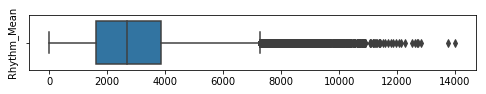

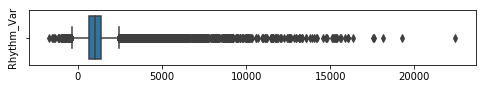

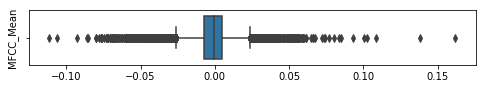

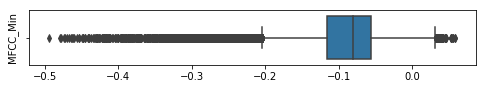

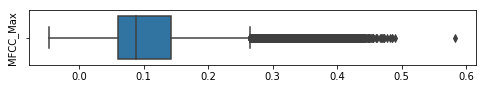

In [6]:
#Checking for outliers:

plt.figure(figsize=(8,1))
sns.boxplot(X.iloc[:,0:24])
plt.ylabel('Rhythm_Mean')
plt.show()
plt.figure(figsize=(8,1))
sns.boxplot(X.iloc[:,48:72])
plt.ylabel('Rhythm_Var')
plt.show()
plt.figure(figsize=(8,1))
sns.boxplot(X.iloc[:,220:228])
plt.ylabel('MFCC_Mean')
plt.show() 

plt.figure(figsize=(8,1))
sns.boxplot(X.iloc[:,240:252])
plt.ylabel('MFCC_Min')
plt.show()

plt.figure(figsize=(8,1))
sns.boxplot(X.iloc[:,252:264])
plt.ylabel('MFCC_Max')
plt.show()

From the above boxplots, it can be observed that there are certain outliers in the data. We will remove those outliers in order for the model to perform better. In addition, we could observe that the column 'MFCC_Mean_1', 'MFCC_Mean_2', 'MFCC_Mean_3', 'MFCC_Mean_4','MFCC_Min_1' seems to have a null or error data. We will drop those columns. 

In [7]:
#Remove outliers 
X = pd.concat([X, y], axis=1)
X = X[X.Rhythm_Mean_15 <= 12000]
X = X[X.Rhythm_Mean_16 <= 12000]
X = X[X.Rhythm_Mean_17 <= 12000]
X = X[X.Rhythm_Mean_17 <= 12000]
X = X[X.MFCC_Max_2 < 0.5]
X = X[(X.MFCC_Mean_5 > -0.8) & (X.MFCC_Mean_5 < 0.8) ]
X = X[(X.MFCC_Mean_6 > -0.8) & (X.MFCC_Mean_6 < 0.8) ]
X = X[(X.MFCC_Mean_7 > -0.8) & (X.MFCC_Mean_7 < 0.8) ]
X = X[(X.MFCC_Mean_8 > -0.8) & (X.MFCC_Mean_8 < 0.8) ]
X = X[(X.MFCC_Mean_9 > -0.8) & (X.MFCC_Mean_9 < 0.8) ]
X = X[(X.MFCC_Mean_10 > -0.8) & (X.MFCC_Mean_10 < 0.8) ]
X = X[(X.MFCC_Mean_11 > -0.8) & (X.MFCC_Mean_11 < 0.8) ]
X = X[(X.MFCC_Mean_12 > -0.8) & (X.MFCC_Mean_12 < 0.8) ]

y = pd.DataFrame(X.Genre)
X = X.iloc[:,:264]

X = X.drop(columns = ['MFCC_Mean_1','MFCC_Mean_2','MFCC_Mean_3','MFCC_Mean_4','MFCC_Min_1'])
X_test = X_test.drop(columns = ['MFCC_Mean_1','MFCC_Mean_2','MFCC_Mean_3','MFCC_Mean_4','MFCC_Min_1'])
indx= X_test.index
#Sanity check how the dimensions has changed
print(X.info())
print(y.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4354 entries, 0 to 4362
Columns: 259 entries, Rhythm_Mean_1 to MFCC_Max_12
dtypes: float64(259)
memory usage: 8.6 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4354 entries, 0 to 4362
Data columns (total 1 columns):
Genre    4354 non-null category
dtypes: category(1)
memory usage: 38.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6544 entries, 0 to 6543
Columns: 259 entries, Rhythm_Mean_1 to MFCC_Max_12
dtypes: float64(259)
memory usage: 12.9 MB
None


## 3. Methods and experiments

Our method to find the best model follows the following process:

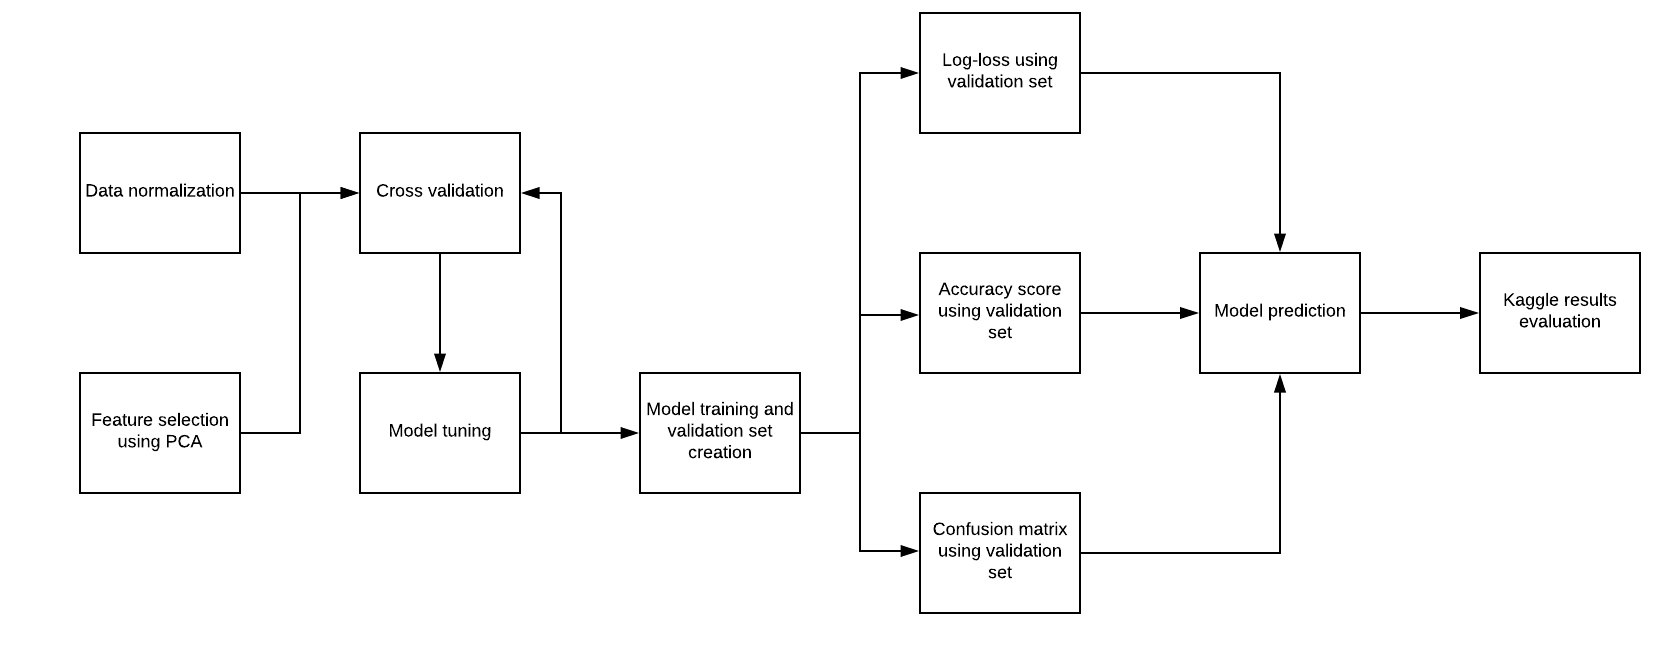

In [8]:
Image(filename='block diagram for methods.png')

After the initial analysis on the data, we apply normalization and principle component analysis (PCA) for dimensional reduction to help the algorithm learn the features better for a more accurate model prediction:

In [9]:
###Normalize data
from sklearn.preprocessing import MinMaxScaler

X = pd.concat([X,X_test]) # Concatenate the training and test datasets into a single dataframe
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
scaler.fit(X)
X = scaler.transform(X)

X_test_norm = X[4354:]
X_norm = X[:4354]


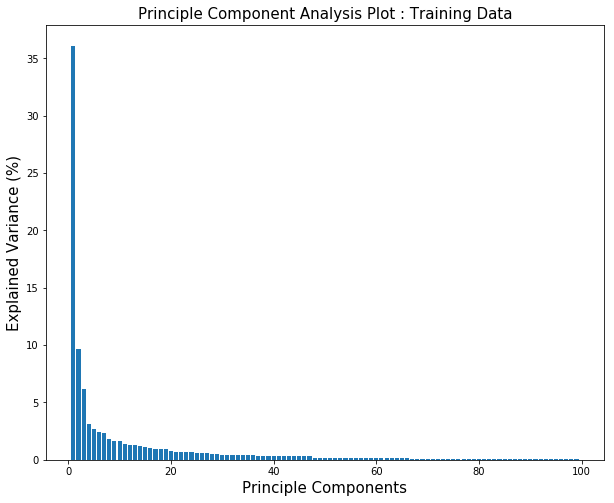

In [10]:
#Feature Selection 
from sklearn.decomposition import PCA
# Choose the number of principle components such that 97% of the variance is retained
pca = PCA(0.97)
X_PCA = pca.fit_transform(X)
varPCA = np.round(pca.explained_variance_ratio_*100, decimals = 1)
# Principal Component Analysis of data
plt.figure(figsize=(10,8))
plt.bar(x=range(1,len(varPCA)+1), height = varPCA)
plt.ylabel("Explained Variance (%)", size = 15)
plt.xlabel("Principle Components", size = 15)
plt.title("Principle Component Analysis Plot : Training Data", size = 15)
plt.show()

X_test_PCA = X_PCA[4354:]
X_PCA = X_PCA[:4354]



To evaluate the effect of PCA on our prediction, two versions of X are created for testing: one for only normalized data, and one for PCA-applied data.

From the initial data discovery, there is a high imbalance, with one class (pop/rock) populating around half in the given dataset. To counter this issue, several methods of undersampling and oversampling (e.g.: SMOTE) have been applied, however, the result ends up worse for the testing dataset scored on Kaggle. Nevertheless, to ensure that overrepresented classes do not get too much weight in models' application, stratification has been used. Moreover, utilizing stratificiation and cross-validation yields a better result than normal cross-validation in relation to bias and variance as underrepresented classes can be well-presented in each fold (Kohavi, 1995).

In [11]:
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold

    
def run_model_norm(model, alg_name):
    global X_norm
    global y
    y = np.ravel(y)    
    cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=36851234)
    results = cross_validate(model, X_norm, y, cv=cv, scoring=["neg_log_loss",'accuracy'])
    print(alg_name, ", Results: Log loss: test ", results['test_neg_log_loss'],", train " ,results['train_neg_log_loss'], "; Accuracy: test ",results['test_accuracy'],", train ",results['train_accuracy'])
    
def run_model_PCA(model, alg_name):
    global X_PCA
    global y
    y = np.ravel(y)    
    cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state = 36851234)
    results = cross_validate(model, X_PCA, y, cv=cv, scoring=["neg_log_loss",'accuracy'])
    print(alg_name, ", Results: Log loss: test", results['test_neg_log_loss'],", train ",results['train_neg_log_loss'], "; Accuracy: test ",results['test_accuracy'],", train ",results['train_accuracy'] )

Two models/methods are chosen in this project: **Logistic Regression and MPL Neural Network**

**Logistic Regression** is an easy and widely used method for binary classification. Classifying a dataset into multiple categories is a problem which can be solved by applying binary classification multiple times and finding the best results to give the best class/ category. The method take less time and computation power than other complicated like deep learning methods. As it performs well enough in many situation, Logistic Regression is also usually used as a baseline method. (Brownlee, 2016)

**Artificial Neural Networks** (usually referred to as Neural Networks) is a deep learning method based on the innerworkings of the brain. It can identify and learn nonlinear data relationship to create an applicable prediction or classification model for modelling complex problems. This is fitting for many real-life data relationship. Moreover, it does not put restriction on the input features and it can deduce from the learned relationships the relationships of new data quite well, making Neural Networks a general model applicable in various different types of machine learning problems with high results.(Mahanta, 2017) Nevertheless, it requires more time and power to perform, thus, it is only applicable in recent years due to technological developments in computational power. (Beam, 2017) The algorithm for Neural Networks in Python applied in this project is named **MPL Neural Network**

These two methods perform well enough to ensure that the result is above the baseline of 0.5 accuracy and stable during our testing. Nevertheless, other methods such as Random Forest, Nearest Neighbors, Decision Tree, SVM, etc. are tested, however, they do not managed to perform as well as the chosen methods. Thus, these other models are not considered in our analysis further and not included in the project report.

First, stratification and cross-validation are used to evaluate the models:

In [12]:
#Running models
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

names = ["Neural Net","LogReg"]

classifiers = [
    MLPClassifier(),
    LogisticRegression()]

for name, clf in zip(names, classifiers):
    run_model_norm(clf, name)
    run_model_PCA(clf, name)

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt

Neural Net , Results: Log loss: test  [-1.15121657 -1.10872433 -1.13434348 -1.16049707] , train  [-0.77642652 -0.81059221 -0.82183962 -0.74615101] ; Accuracy: test  [ 0.64433226  0.64781609  0.64387334  0.64045977] , train  [ 0.75494253  0.74300138  0.73471264  0.75263883]


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt

Neural Net , Results: Log loss: test [-1.45848839 -1.40160344 -1.44153856 -1.49439504] , train  [-0.22733746 -0.25016728 -0.22958282 -0.23175536] ; Accuracy: test  [ 0.61083066  0.62988506  0.62826985  0.62298851] , train  [ 0.96551724  0.95043598  0.96873563  0.96374484]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

LogReg , Results: Log loss: test  [-1.16890816 -1.13492026 -1.15577796 -1.16918369] , train  [-0.98301916 -1.01445277 -1.00338942 -0.98488677] ; Accuracy: test  [ 0.63056448  0.64229885  0.63331804  0.62942529] , train  [ 0.69011494  0.6819642   0.68137931  0.68379991]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

LogReg , Results: Log loss: test [-1.17924673 -1.14452039 -1.1651112  -1.18121035] , train  [-1.01385931 -1.0503234  -1.03659115 -1.01690177] ; Accuracy: test  [ 0.62643414  0.63724138  0.63010555  0.6262069 ] , train  [ 0.67954023  0.66727857  0.67310345  0.67691602]


/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_neg_log_loss'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


From the cross-validation results, even with the default settings, both models perform quite well above the baseline for both evaluation measures on accuracy and log-loss given by the dummy solution on Kaggle's competition leaderboard (0.50993 accuracy and 3.49086 log-loss). Thus, these two models are chosen for model tunning to get a better result in music genre classification.

*It should be noted that sklearn's test scoring measure for log-loss returns the negative version of the actual log-loss and the actual log-loss is the positive number of the given score.*

In [13]:
#Model tuning by changing the default parameters

NeuralNet =  MLPClassifier(alpha=0.3, learning_rate = 'adaptive')
LogReg = LogisticRegression(penalty= 'l1',solver= 'saga',max_iter =500, multi_class='multinomial')

#Running tuned models against cross validation
tuned_classifiers = [
    NeuralNet,
    LogReg]

for name, clf in zip(names, tuned_classifiers):
    run_model_norm(clf, name)
    run_model_PCA(clf, name)


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_neg_log_loss'), which will not be available by default any more in 0.21. If you need training scores, please set return_tr

Neural Net , Results: Log loss: test  [-1.13538362 -1.12203813 -1.13046274 -1.14227903] , train  [-0.90787605 -0.9552656  -0.9399846  -0.90001032] ; Accuracy: test  [ 0.63285911  0.63724138  0.63607159  0.64      ] , train  [ 0.70942529  0.6819642   0.68827586  0.70445158]


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt

Neural Net , Results: Log loss: test [-1.13586479 -1.09619959 -1.12232037 -1.14444754] , train  [-0.64924321 -0.69726462 -0.67277377 -0.6534886 ] ; Accuracy: test  [ 0.64295548  0.65149425  0.65259293  0.64      ] , train  [ 0.79954023  0.79118862  0.79494253  0.80128499]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_neg_log_loss'), which will not be ava

LogReg , Results: Log loss: test  [-1.13519784 -1.11388522 -1.12282205 -1.15189218] , train  [-0.95993184 -0.99365568 -0.98757912 -0.95697628] ; Accuracy: test  [ 0.63423589  0.64137931  0.64433226  0.63770115] , train  [ 0.69103448  0.68793024  0.68091954  0.69022487]
LogReg , Results: Log loss: test [-1.16492983 -1.1350144  -1.15387545 -1.1757887 ] , train  [-0.97764877 -1.01851847 -1.00728588 -0.9784049 ] ; Accuracy: test  [ 0.62964663  0.64091954  0.63285911  0.63310345] , train  [ 0.69149425  0.66819642  0.67632184  0.68379991]


/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_neg_log_loss'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


Comparing the test results from tuned and default models, tuned models generally perform better on both machine learning methods and on both evaluation measures: accuracy and log-loss.


In [14]:
#Running final models for predictions
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

def predict_acc(model, alg_name, X_test):
    global indx 
    y_test = model.predict(X_test)
    result = pd.DataFrame(index= indx, columns = ["Sample_id","Sample_label"])
    result["Sample_id"] = range(1, 6545)
    result["Sample_label"] = y_test
    return result
def predict_log_loss(model, alg_name, X_test):
    global indx
    y_test_prob= model.predict_proba(X_test)
    #Reordering the classes of probabilities to fit class order from 1-10 for Kaggle's submission criteria
    ytp_0 = y_test_prob[:, 0]
    ytp_1=  y_test_prob[:, 1]
    ytp_fixed = np.hstack((ytp_0[:, None], y_test_prob[:, 2:], ytp_1[:, None]))
    result = pd.DataFrame(index = indx, columns = ["Sample_id","Class_1", "Class_2", "Class_3", "Class_4", "CLass_5", "Class_6", "Class_7", "Class_8", "Class_9","Class_10"])
    result["Sample_id"] = range(1, 6545)
    result.iloc[:, 1:] = ytp_fixed
    return result


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

After finalizing the classifiers, the training dataset is divided into a training and validation set (20% of original training dataset) for model evaluation before using the classifiers in the final prediction for Kaggle's submission.

Evaluation measures including accuracy, log-loss and confusion matrix are calculated on the validation set to give an overview on the possible performance of the classifier on unknown data, giving us an indication on models' performance on Kaggle's competition. 

The classifiers/models are then applied on test data and results are generated as CSV files for Kaggle's scoring on accuracy and log-loss.

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


---- Neural Net ----
X_normalized
Accuracy: 0.663605051665
Log loss:  1.07665362269
Normalized


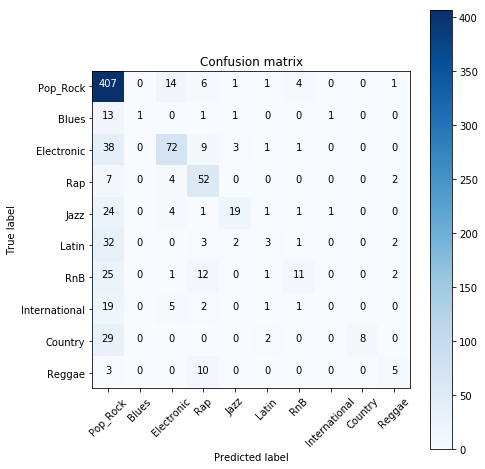

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


---- Neural Net ----
X_PCA
Accuracy: 0.669345579793
Log loss:  1.0647936887
PCA


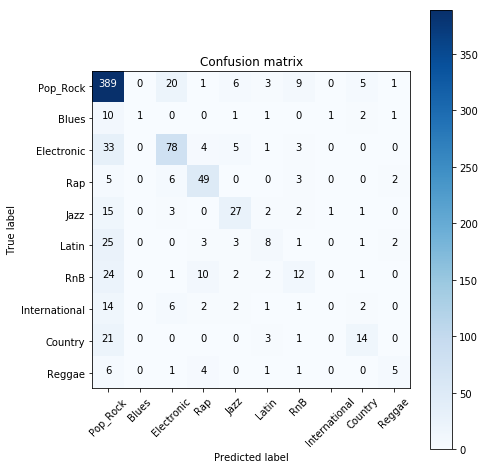

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


---- LogReg ----
X_normalized
Accuracy: 0.661308840413
Log loss:  1.08129375374
Normalized


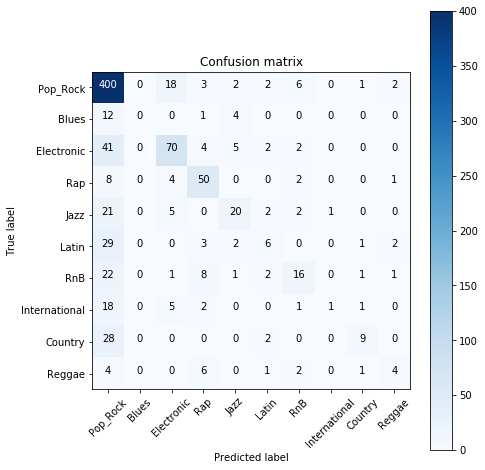

---- LogReg ----
X_PCA
Accuracy: 0.649827784156
Log loss:  1.09618147408
PCA


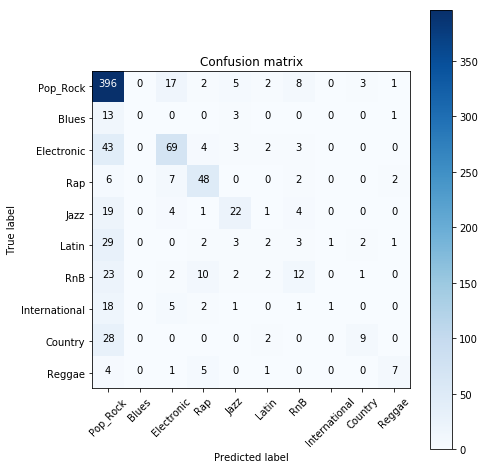

In [15]:
#Predict and get results for each model
from sklearn.metrics import accuracy_score, log_loss

X_model  = {'X_normalized':X_norm, 'X_PCA' :X_PCA}
X_test_pred = {'X_test_normalized' :X_test_norm, 'X_test_PCA' :X_test_PCA}
for name, clf in zip(names, tuned_classifiers):  
    y = np.ravel(y)
    for key, value in X_model.items():
        X_train, X_val, y_train, y_val = train_test_split(value, y, test_size=0.2, random_state=42, stratify = y)
        clf.fit(X_train, y_train)
        print("----",name, "----")
        print(key)
        print("Accuracy:",clf.score(X_val,y_val))
        y_val_pred = clf.predict_proba(X_val)
        print("Log loss: ",log_loss(y_val, y_val_pred))
        if "normalize" in key :
            result_norm_acc = predict_acc(clf, name, X_test_pred.get('X_test_normalized'))
            result_norm_acc.to_csv(str(name + '_X_test_normalized_Accuracy.csv'), index = False)
            result_norm_logloss = predict_log_loss(clf, name, X_test_pred.get('X_test_normalized'))
            result_norm_logloss.to_csv(str(name + '_X_test_normalized_Logloss.csv') , index = False)
            #This is printed to ensure that the model performs as it should
            print('Normalized')
        elif 'PCA' in key :
            result_pca_acc=predict_acc(clf, name, X_test_pred.get('X_test_PCA'))
            result_pca_acc.to_csv(str(name + '_X_test_PCA_Accuracy.csv'), index = False)
            result_pca_logloss =predict_log_loss(clf, name, X_test_pred.get('X_test_PCA'))
            result_pca_logloss.to_csv(str(name + '_X_test_PCA_Logloss.csv') , index = False)
            print('PCA')
        else:
            print('None')
        y_val_pred_acc = clf.predict(X_val)
        
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_val, y_val_pred_acc)
        np.set_printoptions(precision=2)
        
        # Plot non-normalized confusion matrix
        class_names = ['Pop_Rock',  'Blues','Electronic', 'Rap', 'Jazz', 'Latin', 'RnB', 'International', 'Country', 'Reggae']
        plt.figure(figsize = (7,7))
        plot_confusion_matrix(cnf_matrix,classes = class_names,
                              title='Confusion matrix')

    
        plt.show()
    

## 4. Results

These results are test on the validation set (20% of the training set) and test with Kaggle's public board (30% of the test data)

Logistic Regression model with only normalized data:

- Accuracy: 0.6613
- Kaggle's accuracy: 0.6490
- LogLoss: 1.0813
- Kaggle's Log loss: 0.3228
- Confusion matrix:
<img src="LogRegNorm.png">

Logistic Regression model with normalized and dimension reduced data (PCA):

- Accuracy: 0.6498
- Kaggle's accuracy: 0.6470
- LogLoss: 1.0962
- Kaggle's Log loss: 0.3238
- Confusion matrix:
<img src="LogRegPCA.png">

MLPClassifier model with only normalized data:
- Accuracy: 0.6579
- Kaggle's accuracy: 0.6434
- LogLoss: 1.0692
- Kaggle's Log loss: 0.3200
- Confusion matrix:
<img src="NeuralNetNorm.png">

MLPClassifier model with normalized and dimension reduced data:

- Accuracy: 0.6636
- Kaggle's accuracy: 0.6546
- LogLoss: 1.0687
- Kaggle's Log loss: 0.3354
- Confusion matrix:
<img src="NeuralNetPCA.png">

As regards to the Accuracy test, MLPClassifier on PCA dataset performs the best with approx. 66% accuracy. Logistic Regression also generates good result, although slightly worse than the MLPClassifier. 

On the LogLoss test, for some reason we were not able to compare our Log Loss calculation on the validate set versus Kaggle's public board. However, MLPClassifier also seems to perform slightly better than Logistic Regression here. 

Looking at the confusion matrix, there is no significant difference between the models' outputs. The models tend to perform well classifying pop and jazz and perform poorly on the rest. 

As regards to running time, MLPClassifier takes up more time and resources than Logistic Regression. Dimensional reduction using PCA can help speed up the classification process but it could cause a slight increase in Logloss result. 


## 5. Discussion/Conclusions

From the original dataset, we have to remove outliers, normalize data and use PCA to reduce dimensions. Modeling with PCA tends to increase the overfiting issue, therefore, we need to regulate the model with penalty alpha/C higher than the default rate. All of this work, however, help improve the accuracy score by almost 10%.

Due to the imbalance of the class, models would tend to overfit to the majority class. In this case, the distribution of genres in training and testing set seems to be similar, so the model was still able to achieve accuracy of 65%. The rest 35% seems to be causing by not giving the model sufficient data. We have ealier tried to fix this issue by oversampling/undersampling but as these method changes the class distribution, the result is worse. 

Using accuracy as the metric for optimization, the model tends to fit well to the majority classes and ignore the rare classes. Log loss is also a measurement of accuracy, however for this specific multiclass problem, we hasn't been able to optimize based on log-loss due to mismatch result between validation data result and Kaggle data result. 

Depending on the need of the implementer, one might prefer to use Logistic Regression for its ability to process large amount of data quickly while the trade-off for accuracy is not high, or else if the accuracy is the top priority, one might prefer MLPClassifier over Logistic Regression. 

Comparing with other music genre classification discussion, the achieved results is average. Tzanetakis and Cook (2002) tested Gaussian and k-Nearest Neighbors on a similar problem and achieved correct classification of 61%. Li et al. (2003) were also looking into similar problems and proposed a new feature DWCHs which could improve the accuracy to 74.2%. Noticeably, Panagakis and Kotropoulos (2010) proposed a framework that obtained a highest-ever accuracy score 91% on the popular music classification GTZAN dataset. 

There are still some limitations of the model. Firstly, the model is not robust to completely new dataset. Since class distribution is similar in both training and testing set, the model were able to achieve good accuracy level. However, in situations where class distribution changes, the model might perform poorly. Secondly, achieving 65% accuracy might be high for this dataset but low in general, and for some special cases 65% could be nothing. Therefore, in case of more features becoming available, there could be options to explore further if new features can be incorporate to the current models to improve the metrics. Additionally, due to time constraint, some potential methods have not been investigated. For further studies and improvement, we suggest to incorporate semi-supervise learning and model ensembling to this dataset.  
 


## 6. References

Beam, A. (2017). Deep Learning 101 - Part 1: History and Background. [online] Beamandrew.github.io. Available at: https://beamandrew.github.io/deeplearning/2017/02/23/deep_learning_101_part1.html [Accessed 29 Oct. 2018].
<br>
Brownlee, J. (2016). Logistic Regression for Machine Learning. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/logistic-regression-for-machine-learning/ [Accessed 29 Oct. 2018].
<br>
Tzanetakis, G. and Cook, P. (2002). Musical genre classification of audio signals. IEEE Transactions on Speech and Audio Processing, 10(5), p.293-302.
<br>
Kohavi, R. (1995) A study of cross-validation and bootstrap for accuracy estimation and model selection. Proceedings of the 14th international joint conference on Artificial intelligence, p.1137-1143
<br>
Mahanta, J. (2017). Introduction to Neural Networks, Advantages and Applications. [online] Towards Data Science. Available at: https://towardsdatascience.com/introduction-to-neural-networks-advantages-and-applications-96851bd1a207 [Accessed 29 Oct. 2018].
<br>
Panagakis, Y., Kotropoulos, C. and Arce, G. (2010). Non-Negative Multilinear Principal Component Analysis of Auditory Temporal Modulations for Music Genre Classification. IEEE Transactions on Audio, Speech, and Language Processing, 18(3), p.576-588.
<br>
Li T., Ogihara M., Li Q. (2003). A Comparative study on content-based music genre classification. Proceedings of the 26th annual international ACM SI-GIR conference on research and development in information retrieval, p. 282–9.
<br>

## Appendix
*Any additional material needed to complete the report can be included here. For example, if you want to keep  additional source code, additional images or plots, mathematical derivations, etc. The content should be relevant to the report and should help explain or visualize something mentioned earlier. **You can remove the whole Appendix section if there is no need for it.** *